Ссылки на статьи, которые, возможно, стоит изучить подробнее:
1. [Статистика в Data Science — исчерпывающий гид для амбициозных практиков ML](https://habr.com/ru/companies/skillfactory/articles/526972/)
2. [Учебник по статистике](https://isolution.pro/ru/t/statistics/correlation-co-efficient/statistika-koefficient-korrelacii)
3. [mse.msu](https://yandex.ru/search/?text=site%3Amse.msu.ru+%D0%B4%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9+%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB+%D0%B4%D0%BB%D1%8F+%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE&clid=2270455&win=603&lr=216&noreask=1)
4. [Многофакторный дисперсионный анализ - colab](https://colab.research.google.com/drive/1GT6gbkkqjawqcLmU-iguSaTBly38RPZ5?usp=sharing)

# Основы статистики

[Справка по математическим символам (LaTeX/Mathematics)](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

Импорт модулей

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

## Введение

Обычно, размер исследуемых объектов(генеральная совокупность) слишком велик, поэтому исследователь отбирает часть данных(формирует выборку), которая должна быть моделью, отражать природу и  свойства (репрезентативная выборка) исследуемого набора данных. Затем исследователь обощает результаты на всю генеральную совокупность. 

### 1.2 Генеральная совокупность и выборка.

**Генеральная совокупность**\
множество всех объектов, относительно которых будем делать выводы в рамках исследования некоторой научной проблемы. (множество всех объектов на которые мы хотели бы обобщить исследование)

**Выборка**\
это метод исследования, когда из общей изучаемой (генреральной) совокупности однородных единиц отбирается некоторая её часть (выборочная совокупность) и только эта часть подвергается обследованию.

**Репрезентативная выборка**\
это часть целевой аудитории, которая отражает ключевые характеристики всей совокупности пользователей (пол, возраст, местоположение, интересы).\
Выборка считается репрезентативной, когда по выбранной маленькой группе можно судить о более широкой аудитории. То есть когда свойства, присущие выбранной из целевой аудитории группы, можно распространить на всю целевую аудиторию. \
Допустимая погрешность при расчёте репрезентативной выборки варьируется в пределах 1-5%.


#### Способы формирования выборок

**Простая случайная выборка(simple random sample)**\
Чтобы её сформировать мы случайным образом начинаем выбирать элементы генеральной совокупности для участия в нашем эксперименте или исследовании (репрезентативная)

In [2]:
# Load a sample dataframe
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

# Select 10 random rows
sample_df = df.sample(frac=0.1) # or n = 10

sample_df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7039,15039,23,Female,145989,Social Media,Awareness,449.253851,0.097335,0.106053,39,7.445286,14.983718,76,15,6,6,3260,IsConfid,ToolConfid,1
2872,10872,26,Female,113318,Email,Awareness,5446.082686,0.176270,0.174322,27,7.507299,8.427038,72,3,6,6,3576,IsConfid,ToolConfid,1
1583,9583,61,Male,95723,Social Media,Retention,7124.097441,0.042280,0.116746,5,2.435505,10.987191,31,12,5,1,2528,IsConfid,ToolConfid,1
776,8776,45,Male,67199,Referral,Awareness,1905.059375,0.169105,0.131818,27,7.743358,14.580877,27,8,4,9,1287,IsConfid,ToolConfid,1
1156,9156,22,Female,114948,Email,Retention,2813.024630,0.122295,0.117752,15,2.556330,7.865573,61,2,9,9,1785,IsConfid,ToolConfid,1


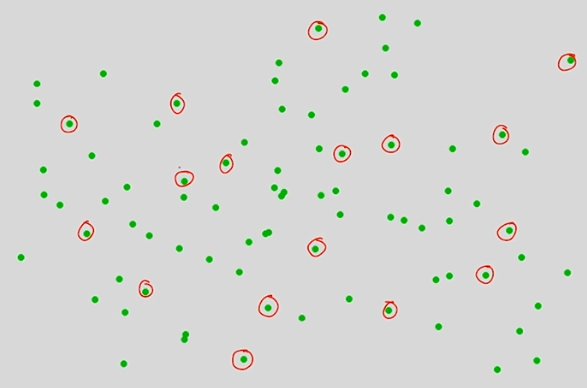

**Стратифицированная выборка**\
Применяется в случае неоднородности генеральной совокупности. По этой неоднородности генеральная совокупность разбивается на группы(страты). В каждой страте отбор осуществляется случайным или механическим образом. Для людей это может быть пол или возраст, для страны этнические группы, для больниц их профиль и т.д.

In [3]:
df_male = df.loc[df['Gender'] == 'Male', :]\
            .sample(n=5)
df_female = df.loc[df['Gender'] == 'Female', :]\
            .sample(n=5)

In [4]:
frames = [df_male, df_female]
sample_df2 = pd.concat(frames)
sample_df2

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
4375,12375,58,Male,55449,PPC,Awareness,8454.358168,0.183712,0.175675,25,4.905570,6.649702,92,11,1,6,3451,IsConfid,ToolConfid,1
3550,11550,55,Male,23728,Referral,Conversion,8949.990749,0.107347,0.055304,46,2.574286,10.312066,36,1,8,4,4841,IsConfid,ToolConfid,1
808,8808,49,Male,131118,PPC,Retention,9554.633482,0.021234,0.031322,15,6.905728,3.316535,68,10,6,4,4705,IsConfid,ToolConfid,1
7103,15103,60,Male,129912,Referral,Conversion,5082.439527,0.021039,0.014141,38,4.199641,7.846699,69,15,9,2,1356,IsConfid,ToolConfid,1
384,8384,46,Male,28039,Email,Retention,8255.882467,0.172154,0.133712,35,3.999777,3.088704,25,11,5,7,1960,IsConfid,ToolConfid,1
5937,13937,54,Female,55035,Referral,Conversion,2122.121772,0.208439,0.057053,33,1.211034,12.576137,27,19,5,3,4512,IsConfid,ToolConfid,1
5700,13700,53,Female,77235,Social Media,Awareness,4889.166102,0.276859,0.090875,35,1.916366,6.205587,45,10,3,3,1789,IsConfid,ToolConfid,1
2011,10011,34,Female,48502,PPC,Retention,8998.854190,0.269798,0.012978,36,1.537660,9.550179,0,5,4,7,2886,IsConfid,ToolConfid,1
4238,12238,23,Female,141281,Referral,Awareness,2466.395843,0.255372,0.131437,34,1.325163,9.526099,92,12,8,3,3011,IsConfid,ToolConfid,1
6306,14306,28,Female,20974,Social Media,Awareness,3668.802571,0.199704,0.030903,14,4.121930,9.951479,1,13,6,8,4215,IsConfid,ToolConfid,1


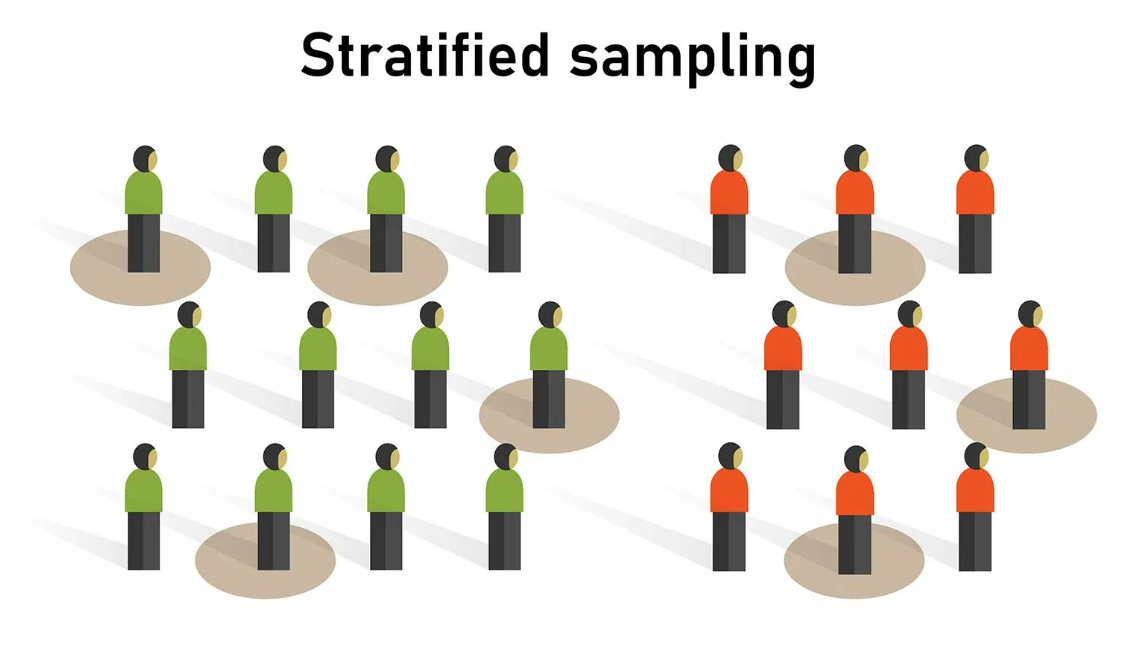

**Групповая выборка(<u>claster sample)**\
Генеральная совокупность разделяется на несколько групп(кластеров), в данном случае все кластеры будут сильно похожи между собой. Способ используется для экономии ресурсов и времени при формировании выборки. Пример: делим Санкт-Петербург на несколько географических районов, а население данных районов не будет сильно оличаться друг от друга. Затем отбираем несколько кластеров и методом случайной выборки формируем из них набор элементов для исследования.

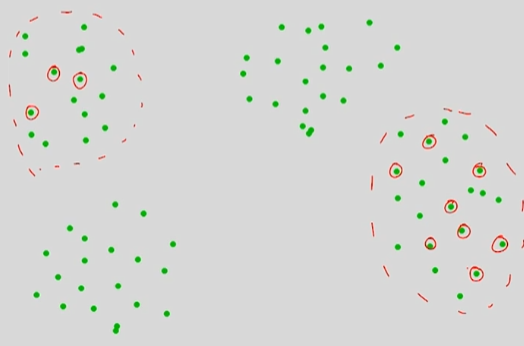

In [5]:
gr_select = df.loc[df['CampaignType'] == 'Consideration']

Разбиение на кластеры

In [6]:
cluster_1, cluster_2 = train_test_split(gr_select, test_size=0.5, train_size=0.5,
                 random_state=235)

In [7]:
cluster_1, cluster_2, cluster_3, cluster_4 = train_test_split(
    cluster_1, cluster_2,
    test_size=0.5,
    train_size=0.5,
    random_state=235)


In [8]:
for el in [cluster_1, cluster_2, cluster_3, cluster_4]:
    print(el.shape[0], end=' ')

497 497 497 497 

In [9]:
cluster_1 = cluster_1.sample(10)
cluster_4 = cluster_4.sample(10)

In [10]:
cluster_1.shape, cluster_2.shape

((10, 20), (497, 20))

---

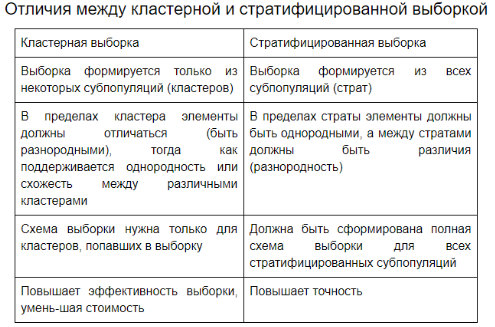

### 1.3. Типы переменных. Количественные и номинативные переменные

|Типы переменных|Подтипы|Описание|Пример|
|:---|:---:|:---|:---|
| Количественные | | Измеренное значение некоторого признака | Рост |
| | непрерывные | Может принимать любое значение на промежутке | Рост может принимать любое значение на промежутке от 160 до 190 см |
| | дискретные | Может принимать только определённые значения | число детей в семье: 1, 2, 3. А 3,5 ребёнка быть не может |
| Качественнные | | | |
| | номинативные/Категориальные | Нужны для разделения испытуемых на группы. За номинативными переменными не стоит никакого математического смысла (классификация). Цифры - это имена групп | Все участники женского пола обозначены цифрой 1, а мужского 2 (1 - ж, 2 - м) |
|  | ранговые | переменные, в которых можно установить порядок между значениями. Единственная математическая операция, допустимая в данном случае это сравнение. Но ни на сколько, ни во сколько сказать нельзя. Количественные переменные, такие, как возраст, доход, также можно использовать в качестве ранговых | оценки с значениями "плохо", "средне", "хорошо" или инофрмация а марафонском забеге, где каждому участнику присваивается место |

### 1.4 Меры центральной тенденции

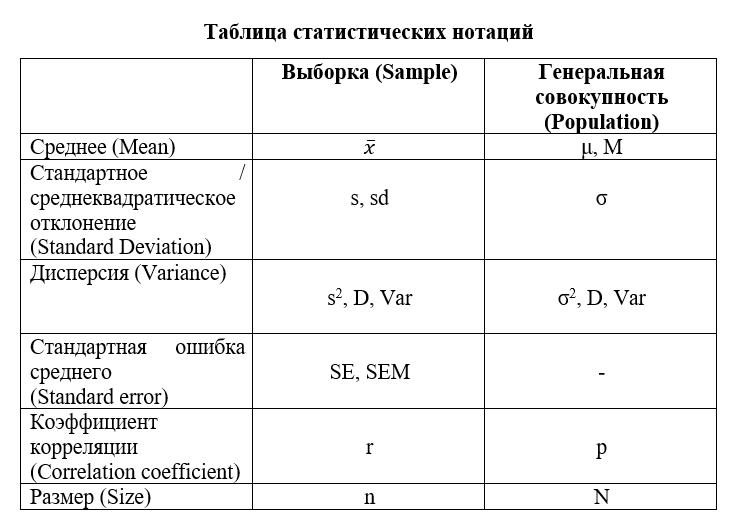

| Мера | Описание | Пример |
| :--- | :--- | :--- |
| Мода | значение измеряемого признака, которое встречается максимально часто |  |
| Медиана | значение признака, которое делит упорядоченное множество пополам |  |
| Среднее значение (mean) | сумма всех значений измеренного признака, деленная на количество измеренных значений |  |


> Если распределение симметрично, унимодально и не имеет заметных выбросов - можно использовать любую из мод центральной тенденции. Однако, если есть ассеметрия, заметны выбросы или несколько мод, тогда использование среднего значения может привести нас к некорректному результату и гораздо лучше использовать моду или медиану для того, чтобы охарактеризовать данные с точки выраженности некоторого количественного признака.

**Свойства среднего**
1. Если к каждому значению нашей выборки прибавить определённое число, то и среднее значение также увеличиться на это число;
2. Если мы каждое значение умножим на некоторое число, то и среднее значение также увеличиться в это же число раз;
3. Если мы для каждого значения в выборке рассчитаем такой показатель, как его отклонение от среднего арифметического, то сумма этих отклонений будет равняться 0;
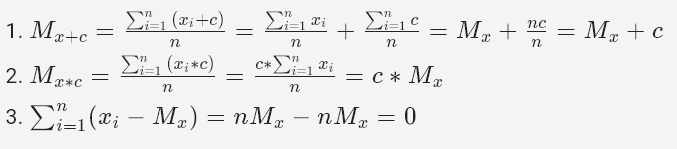

В ситуации унимодального и симметричного распределения именно среднее арифметическое очень часто используется в статистике и как в качестве меры центральной тенденции и для решения более интересных задач. 

### 1.5 Меры изменчивости

**Размах**

Размах (Range) - это разность максимального и минимального значения.

$R = X_{max} - X_{min}$

**Дисперсия**

Дисперсия (variance) - средний квадрат отклонений индивидуальных значений признака от их средней величины. (в квадрат возводят для того, чтобы положительное и отрицательные смещения не компенсировали друг друга)

$\Large D = \frac{\sum_{} (x_{i} - \bar{x})^2}{n}$

При этом показатель дисперсии будет превышать реальные средние отклонения наших наблюдений от среднего по выборке 

**Среднее квадратическое отклонение (СКО)**\
Чтобы вернуться к исходным единицам измерения, найдём корень из дисперсии - этот показатель называется среднее квадратическое отклонение (СКО)


| Размер данных | Формула | Примечание |
| :--- | :--- | :--- |
| генеральная совокупность | $\Large\sigma=\sqrt{\frac{\sum_{} (x_{i} - \bar{x})^2}{n}}$ | |
| выборка | $\Large sd=\sqrt{\frac{\sum_{} (x_{i} - \bar{x})^2}{n-1}}$ | Учитываем степени свободы и корректируем значение с помощью n - 1 |


**Свойства дисперсии**

> Если к каждому наблюдению выборки, прибавить некоторое число в таком случае ни дисперсия, ни стандартное отклонение нового распределия не изменится и не будет отличаться от предидущего значения.
> 
> $\large D_{x+c} = D_x$ 
> 
> $\large sd_{x+c} = sd_x$
>
> 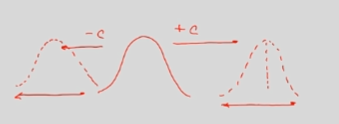

> Если значение каждого признака умножить на некоторое число, отличное от 0 и 1, то распределение будет более широким. Изменчивость данных увеличиться.
> 
> $\large D_{x*c} = D_x * c^2$
>
>$\large sd_{x*c} = sd_x*c$
>
> 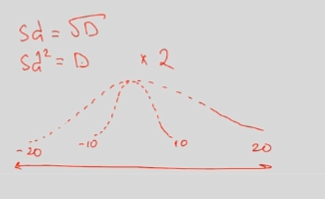


### 1.6 Квартили распределения и график box-plot

| Понятие | Определение |
| :--- | :--- |
| Квантили распределения | это такие значения признака, которые делят упорядченные данные на некоторое число равных частей |
| Квартили распределения | это такие три точки, которые делят наши данные на четыре(4)   равные части |

**Кваритили**

> Делим данные пополам медианой, затем каждую половину еще раз медианой пополам. 
Используя квартили, можно легко описать наше распределение и построить график box-plot

**Box plot (ящик с усами)**

> Он позволяет визиуализировать обширную информацию о данных. Описание ящика:
> -  центром графика является медиана значений или 2-ой квартиль наших данных;
> -  верхняя граница - это 3-ий квартиль;
> -  нижняя граница - это 1-ый квартиль.
>   
> Расстояние между 1 и 3 квартилем называется межквартильный размах - используется в качестве одной из мер изменчивости. Чем больше межквартильный размах, там больше вариативность признака.
>
> Отложим 1,5 межквартильного размаха вверх и вниз от границ межквартильного размаха, те значения признака которые последними принадлежат этому промежутку и будут границами усов графика.
>
> Точки за пределами границ являются выбросами
>
> 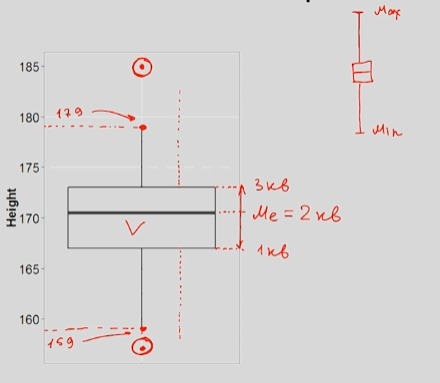

> 50% наблюдений окажется между первым и третьим квартилем, остальные окажутся в интервале усов,  а те, что будут за границами усов - это данные, которые значительно отличаются от остальных
> 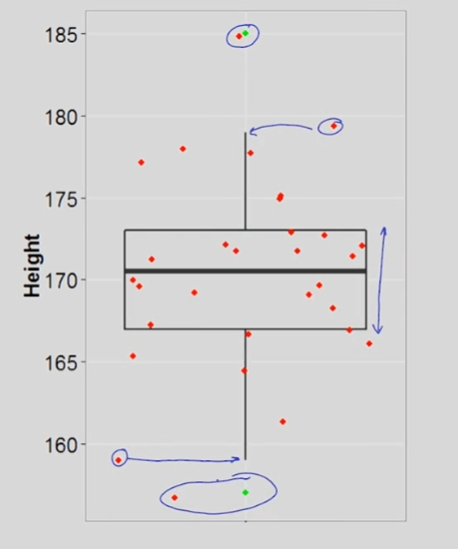

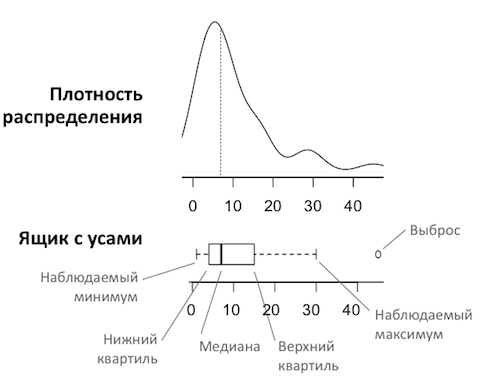

### 1.7 Нормальное распределение

- это унимодальное и симметричное распределение, отклонения от среднего равновероятны и подчиняются определённому равновероятностному закону:
    -  в диапазоне от среднего ($\mu$) до одного стандартного отклонения ($1\sigma$) будут находиться приблизиительно 34.1 % всех наблюдений;
    -  в диапазоне от $1\sigma$ до $2\sigma$ - примерно 13.6% всех наблюдений;
    -  в диапазоне от $2\sigma$ до $3\sigma$ - примерно 2.1% всех наблюдений;
    -  свыше $3\sigma$ - 0.1% всех наблюдеий.

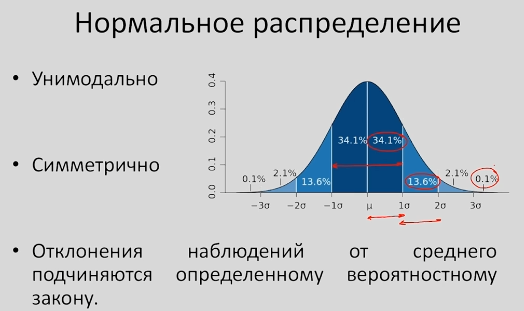

В природе большое количество характеристик распределены нормальным образом.

**Z-стандартизация**

- преобразование данных, которое позволяет любую шкалу перевести к виду (Z-шкалу/Z-scores), где среднее значение будет равняться 0 ($M_z = 0$), а  дисперсия будет равняться 1 ($D_z = 1$).

> Чтобы преобразовать в Z-шкалу необходимо из каждого наблюдения отнять среднее значение и разделить на стандартное отклонение (все относительно рассматриваемой выборки)
> 
> $ \large Z_i = \frac{x_i - \bar{X}}{sd}$

**Z-преобразование при работе с нормальным распределением**

Значения отклоняются от среднего с некоторым вероятностным законом. Этот вероятностный закон называют правилом двух и трех сигм.

**Правило "двух" и "трех" сигм (стандартное отклонение)**\
В диапазоне $M_x$(среднее) $\pm \sigma$(стандартное отклонение) находиться примерно
- $\large M_x \pm \sigma \approx 68$% наблюдений
- $\large M_x \pm 2\sigma \approx 95$% наблюдений
- $\large M_x \pm 3\sigma \approx 100$% наблюдений

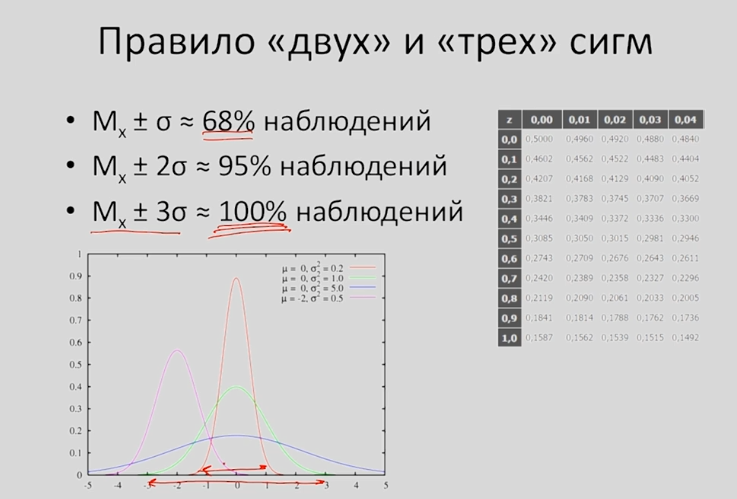


**Z-преобразование** позволит узнать какой процент наблюдений лежит в интересующем нас диапазоне


**Задача**

*Дано:*\
$\bar{X} = 150$\
$sd = 8$

*Вопрос:*\
Какой процент наблюдений превосходит значение равное **154**

*Решение:*\
Для начала можно использовать Z-преобразование

$\large Z = \frac{154-150}{8} = 0,5$

По таблице находим\
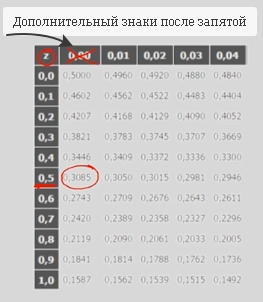

В диапазоне, превышающем 154(по заданию) или 0,5 по Z-шкале, находится приблизительно 30%(0,3085) наблюдений.

На языке вероятностей:\
Вероятность встретить значение, превосходящее 0.5(154) в Z-шкале, составляет $\approx$ 0,3. 

Таблицы z-значений

- [процент наблюдений, не превышающий указанное z-значение](https://web.archive.org/web/20180729102938/http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf)
- [процент наблюдений, превышающий указанное z-значение](http://www.normaltable.com/ztable-righttailed.html%C2%A0%20)
- [вычислить процент наблюдений в интересующем нас диапазоне](https://gallery.shinyapps.io/dist_calc/)

**Задача**

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?

**Решение**
1. Количество людей с IQ ниже 70: (|70-100|)/15 = -2,0, по таблице = 2,28%
2. Количество людей с IQ выше 112: (|112-100|)/15 = 0,8, по таблице = 21,19%
3. Нас интересуют те значение, которые не попали в указанные выше интервалы, т.е. 100-2,28-21,19 = 76,53%.


In [11]:
def Z_transform(task, sd, M):
    result = (task - M)/sd
    return result

In [12]:
task_1 = 112
task_2 = 70
sd = 15
M = 100

Z_transform(task_1, sd, M)

0.8

In [13]:
Z_transform(task_2, sd, M)

-2.0

In [14]:
# -2 по Z-шкале 0.0228
# 0.8 - 0.7881
0.7881 - 0.0228

0.7653

### 1.8 Центральная предельная теорема (ЦПТ)

> Исследуемый признак имеет нормальное распределение в генеральной совокупности с некоторым среднем значением и стандартным отклонением и мы многократно извлекаем выборки, равного n по объёму и в каждой выборке рассчитываем среднее значение, после чего строим распеределение этих выборочных средних. Так вот такое распределение будет являться нормальным со средним совпадающим с этим показателем генеральной совокупности и со стандартным отклонением этого распределения $SE$ (стандартная ошибка среднего)
> 
>$\large SE = \frac{\sigma}{\sqrt{n}}$
>- $SE$ - стандартная ошибка среднего;
>- $\sigma$ - стандартное отклонение признаков генеральной совокупности;
>- $n$ - число наблюдений.

> Если число наблюдений больше 30 при чём это выборка представляет собой репрезентативную выборку, то справедливо следующее:\
>$\large SE = \frac{\sigma}{\sqrt{n}} = \frac{sd_x}{\sqrt{n}}$
>
> - $sd_x$ - стандартное отклонение выборки

### 1.9 Доверительные интервалы для среднего

Доп. ресурс:
- [Доверительные интервалы](https://mse.msu.ru/wp-content/uploads/2020/03/Лекция-5-доверительные-интервалы.pdf)

In [15]:
1 - (0.02/2)

0.99

Знания центральной предельной теоремы для решени задачи нахождения доверительных интервалов для средних значений


Доверительный интервал
- это интервал, в пределах которого с заданной вероятностью лежат выборочные оценки статистических характеристик генеральной совокупности.

Рассчёт 95% доверительного интервала для среднего генеральной совокупности по одной выборке:
- $\bar{X} \pm 1.96*SE$

P.s. коэффициент 1.96 берётся из таблицы

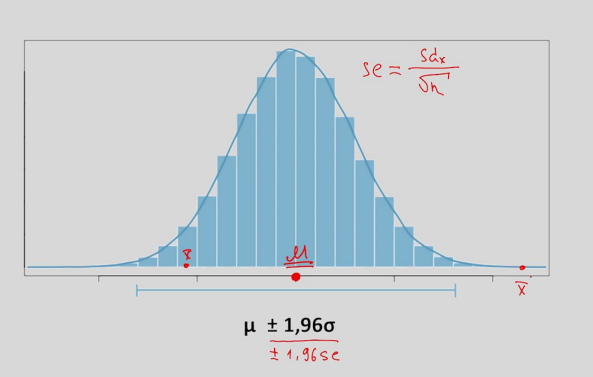

In [16]:
def standard_error(sd, n):
    return sd/(n**0.5)

def confidence_interval(sd, n, X, interval_size = 95):
    tab_of_coef = {95: 1.96, 99: 2.58}
    coef = tab_of_coef[interval_size]
    se = standard_error(sd, n)
    return X - coef * se, X + coef * se

In [17]:
# 130 = 136 - 2.58 * se
# -6 = -2.58 * se
se = 6/2.58

In [18]:
6/2.58

2.3255813953488373

In [19]:
sd = 4
n = 64
X = 18.5 # среднее значение выборки (X)

In [20]:
confidence_interval(sd, n, X)

(17.52, 19.48)

In [21]:
confidence_interval(5, 100, 10, 99)

(8.71, 11.29)

### 1.10 Идея статистического вывода, p-уровень значимости

Предположим, что на выздоровление при некотором заболевании в среднем требуется 20 дней, однако мы разработали новый препарат и хотим проверить сократится ли этот срок.

1. Необходимо сформировать 2 гипотезы:
     - $H_0$ обычно формулируется как отсутствие различий при введении новых данных(при использовании препарата), которые могут повлиять на эксперимент;
     - $H_1$ формулируется как появлений различий(при использовании препарата) в эксперименте;

2. Предположим, что верна нулевая гипотеза($H_0$), тогда в соответствии  Центральной Предельной Теоремой, если бы мы многократно повторяли наше исследование, то выборочные средние распределились бы нормальным образом, вокруг среднего генеральной совокупности и со стандартной ошибкой среднего $\large SE = \frac{sd}{\sqrt{n}}$

4. Теперь нужно ответить на вопрос: на сколько наше выборочное среднее отклониловь от предполагаемого среднего значения генеральной совокупности в единицах стандартного отклонения. Для этого сделаем Z-преобразование $Z = \frac{\bar{X} - M}{SE}$
       


**P-value / p-уровень значимости**\
собес

- вероятность отклонения от $H_0$(0 гипотезы). Она должна быть ниже некоторого порога, чтобы 0 гипотезы была верна. Порог p-value выбирается исследователем, но обычно это значение составляет 0.05;

Про статистический вывод и p-value
- Мы допускаем, что верна $H_0$ (никаких различий или взаимосвязей в генеральной совокупности нет), после этого рассчитываем вероятность того, что мы получим такие или еще более сильно выраженные различия абсолютно случайно - эта вероятность называется p-уровень значимости. Благодаря этому критерию можно выяснить какая гипотеза наиболее состоятельна. Чем меньше p-уровень значимости, тем больше у исследователя оснований отклонить $H_0$.

Условия при которых отклояем $H_0$:

$H_0$: $М_{нп} = 20$ принимаем при p-value > 0.05\
$H_1$: $М_{нп} \neq 20$ принимаем при p-value < 0.05

In [22]:
from math import sqrt
import scipy.stats as st

sp = 20
n = 64
mean = 18.5
std = 4

se = std / sqrt(n)
z_value = (mean - sp) / se
p_scope = st.norm.cdf(z_value)*2
p_scope

0.002699796063260186

In [23]:
from scipy.stats import norm
print(norm.ppf(0.95))
print(norm.cdf(1.6448536269514722))

1.6448536269514722
0.95


In [24]:
a = 0.5, 0
b = 2, 1

cos_f = (
    (a[0] * b[0] + a[1] * b[1])/
    ((a[0]**2 + a[1]**2)**0.5 * (b[0]**2 + b[1]**2)**0.5)
)
round(cos_f, 4)

0.8944

In [25]:
def stand_error(sd, n):
    return sd / n ** 0.5


def z_transform(X, M, sd, n):
    return (X - M)/stand_error(sd, n)



In [26]:
M = 115
X = 118
n = 144
sd = 9

In [27]:
z_transform(X, M, sd, n)

4.0

In [28]:
stand_error(sd, n)

0.75

## Сравнение средних

### 2.1 Т-распределение

> Распределение Стьюдента используется:
> - число наблюдений < 30;
> - $\sigma$ (стандартное отклонение генеральной совокупности) неизвестно;
>
>  Чтобы описать как будут себя вести все выборочные средние.

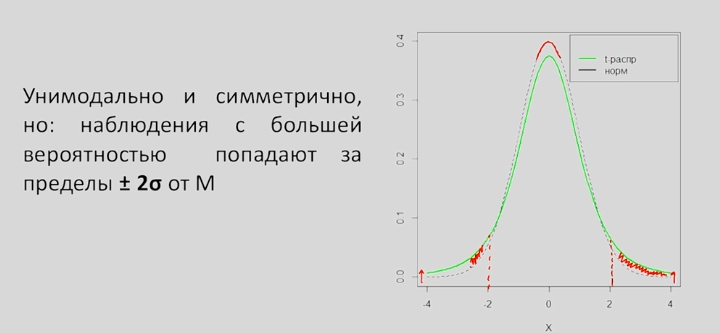

> Очень важным параметром t-распределения(Стьюдента) является число степеней свободы, которое зависит от количества наблюдений в нашей выборке.
> Количество степеней свободы определяется как $df = n - 1$. От количества степеней свободы зависит "Форма" распределения. С увеличением числа df распределение стремится к нормальному.

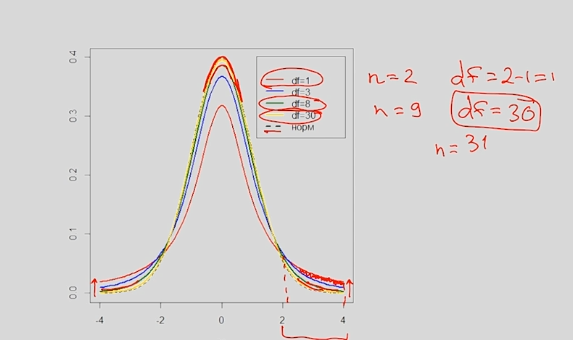


### 2.2 Сравнение двух средних. t-критерий Стьюдента

Для сравнивания двух выборок между собой(двух выборочных средних) используется *парный t-тест*, именуемый также как *критерий t-Стьюдента*

---
Стандартная ошибка среднего для двух выборок рассчитывается как: 

$\large SE = \sqrt{\frac{sd_1^{2}}{n_1} + \frac{sd_2^{2}}{n_2}}$

Число степеней свободы для 2 выборок:\
$df = n_1 + n_2 - 2$

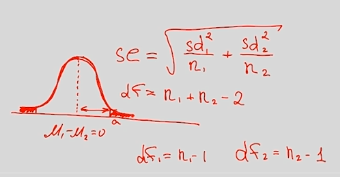

При условии, что нулевая гипотеза верна:

$H_0: M_1 = M_2$\
$H_1: M_1 \neq M_2$

t-критерий рассчитывается по формуле:

$\large t = \frac{(\bar{X_1} - \bar{X_2}) - (M_1 - M_2)}{\sqrt{\frac{sd_1^{2}}{n_1} + \frac{sd_2^{2}}{n_2}}}$

При условии, что нулевая гипотеза верна, выражение можно упростить:\
$\large t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{sd_1^{2}}{n_1} + \frac{sd_2^{2}}{n_2}}}$

P уровень значимости будет найден исходя из кол-ва степеней свободы и значения парного t-критерия

In [29]:
def t_criteria(sd, n, X):
    formula = 2.093 * (sd / n**0.5)
    return round(X - formula, 2), round(X + formula, 2)


In [30]:
sd = 11.3
n = 20
X = 89.9

t_criteria(sd, n, X)

(84.61, 95.19)

In [31]:
# мужчины
M1 = 45
sd1 = 9
n1 = 100
# женщины
M2 = 34
sd2 = 10
n2 = 100

def student_t_test():
    numenator = M1 - M2
    denominator = (sd1**2/n1 + sd2**2/n2)**0.5
    return numenator/denominator

In [32]:
student_t_test()

8.176235608718828

### 2.3 Проверка распределения на нормальность, QQ-Plot

Для проверки на нормальность можно построить гистограмму частот и наложить на неё кривую нормального распределения, то на сколько они совпадут будет говорить о нормальности.

In [33]:
iris = datasets.load_iris()

In [34]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [36]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

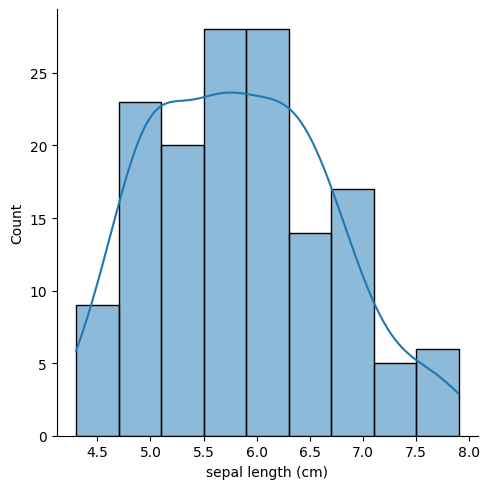

In [37]:
sns_plot = sns.displot(data=data['sepal length (cm)'], kde=True)

**QQ Plot**

Показывает на сколько выборочные значения хорошо соответствуют предсказанным значениям, если бы распределение было идеально нормальным.

> QQ-plot -- это вот что: берём $0.01$-квантиль теоретического (с которым сравниваем) распределения, например нормального, как здесь -- это $x_1$($\approx -2.33$ для нормального). Затем берём $0.01$-квантиль нашей выборки -- это $y_1$. Рисуем на графике точку ($𝑥_1, 𝑦_1$).\
Потом берём $0.02$-квантиль теоретического распределения -- это $𝑥_2$, и 0.02-квантиль выборки -- это $𝑦_2$. Опять рисуем на графике точку ($𝑥_2,𝑦_2$).\
И так далее. Естественно, рисовать точки можно с любым шагом, не только 0.01.\
Распределения одинаковые, если все эти точки попадут на прямую $𝑦=𝑥$. Если на другую прямую, то это значит, что распределения одинаковы с точностью до нормализации.\
Если строго, то обозначив за $F_s$ и $F_t$ функции распределения соответственно выборки и теоретического распределения, получим формулу для графика QQ-plot: $y = F_s(F_t^{−1}(x))$. ($F^{−1}$-- это получается функция квантилей)


Ресурс на то как строится QQ-plot наглядно! + [ссылка](https://desktop.arcgis.com/ru/arcmap/10.5/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm)
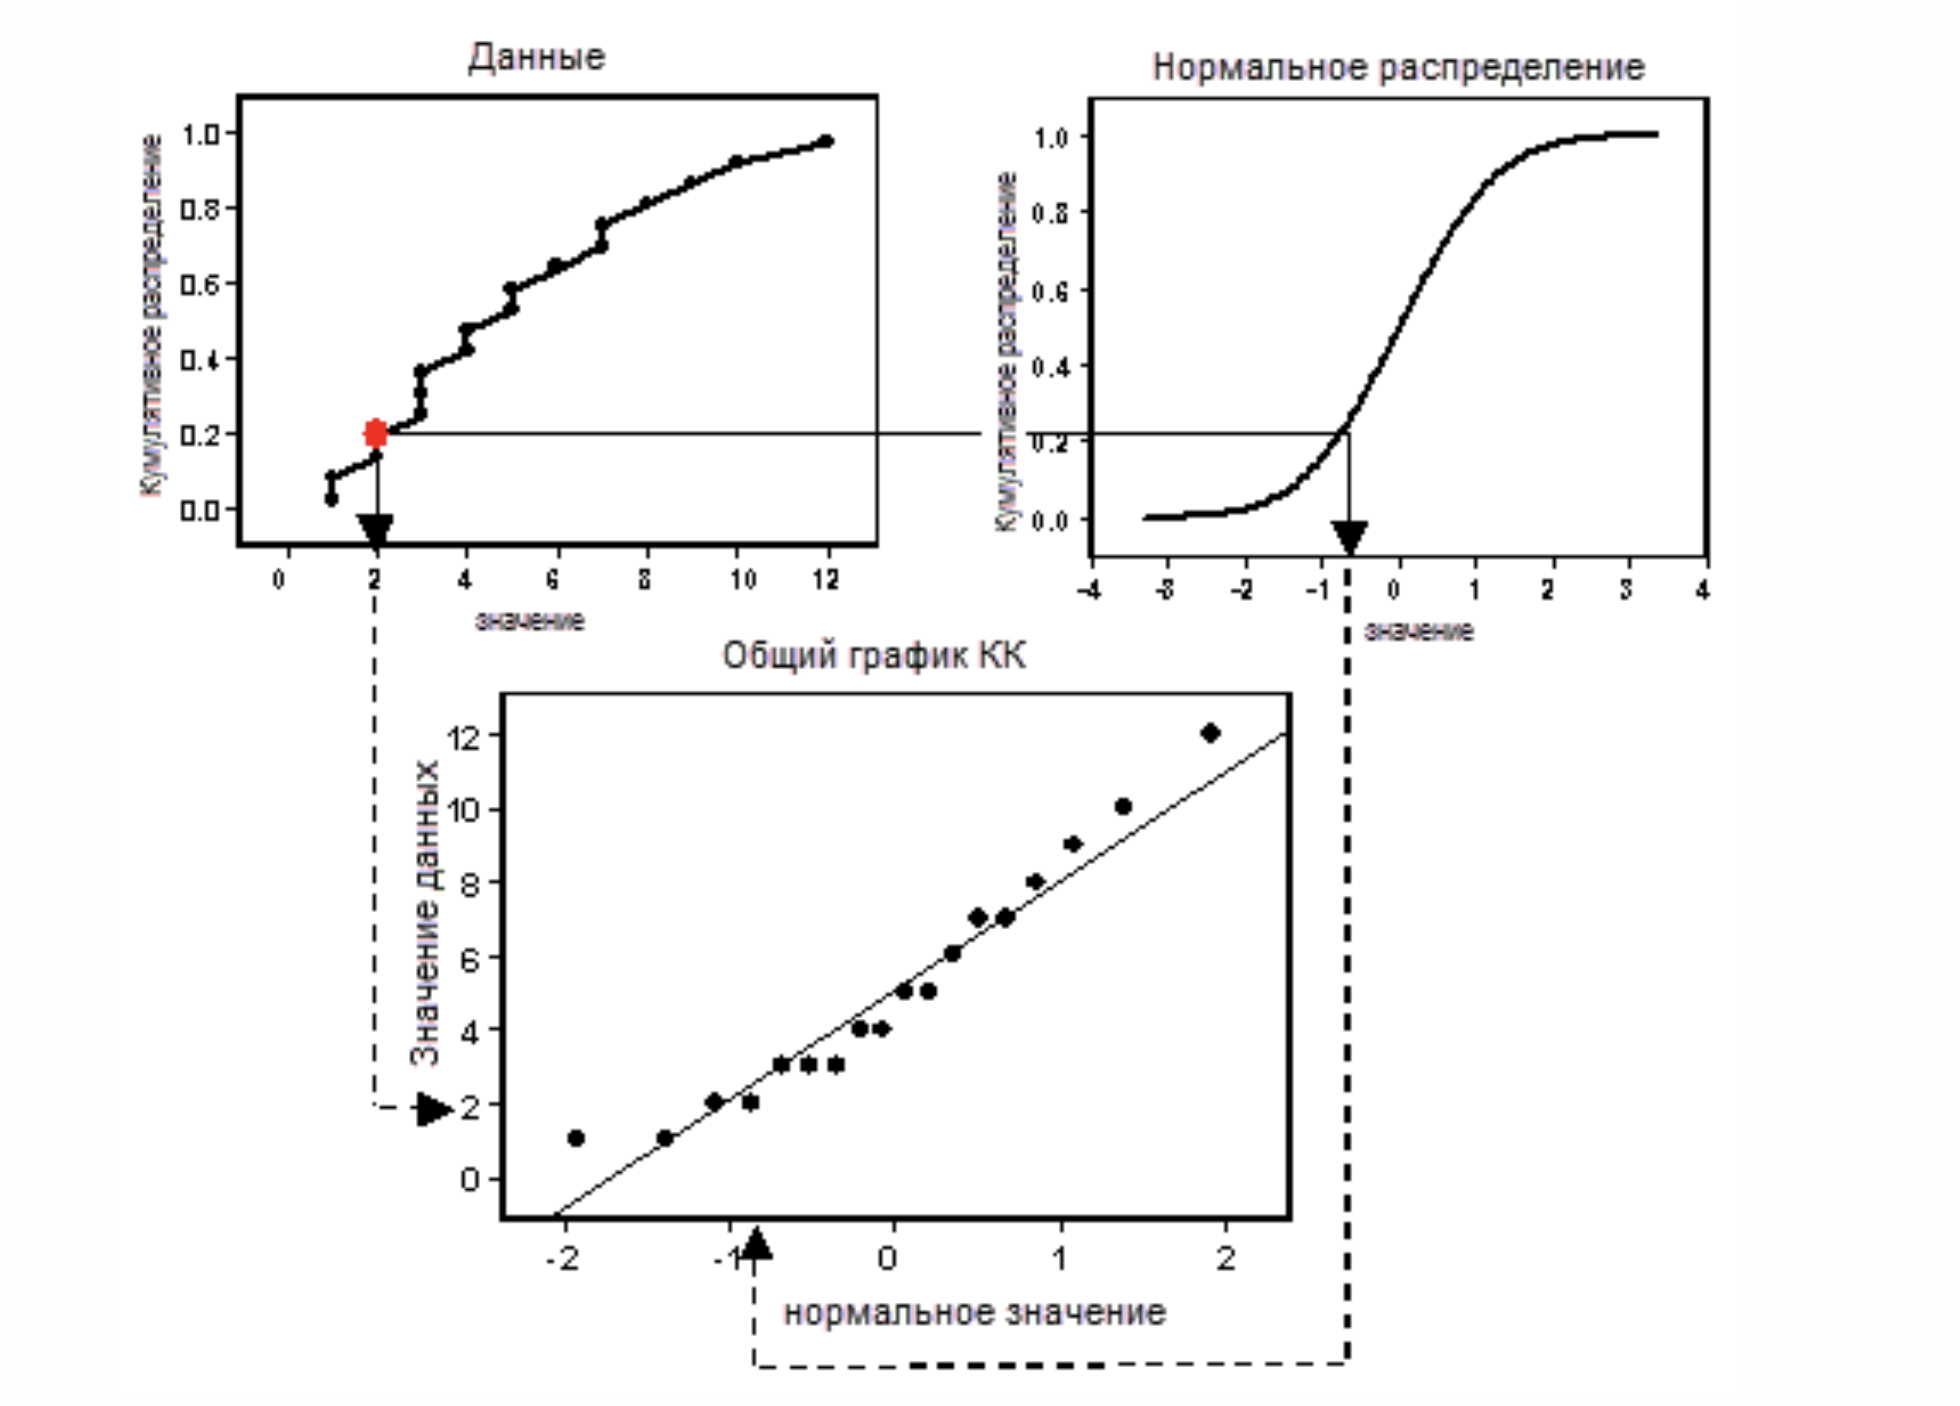

Тут я пытаюсь разобраться с тем как строить график QQ-plot используя набор данных load_iris() из модуля sklearn.datasets

In [38]:
def qq_plot_graph(data_st, exog):
    exog = sm.add_constant(exog)
    mod_fit = sm.OLS(data_st, exog).fit()
    res = mod_fit.resid
    fig = sm.qqplot(res, stats.t, fit=True, line='45')
    plt.show()


In [39]:
exog = data.drop(['sepal length (cm)'], axis=1)
data_st = data['sepal length (cm)']

In [40]:
exog.head()

,sepal width (cm),petal length (cm),petal width (cm),target
0,3.5,1.4,0.2,0.0
1,3.0,1.4,0.2,0.0
2,3.2,1.3,0.2,0.0
3,3.1,1.5,0.2,0.0
4,3.6,1.4,0.2,0.0


In [41]:
data_st.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

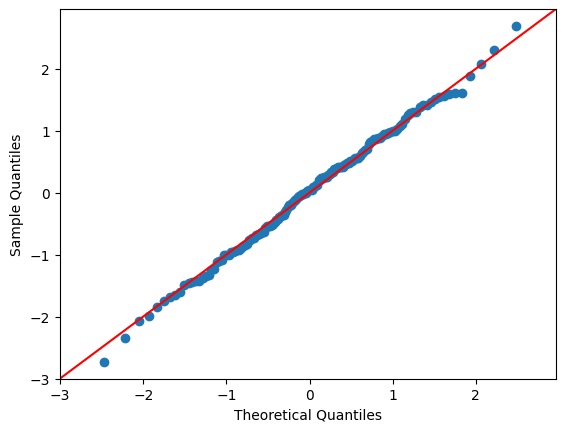

In [42]:
qq_plot_graph(data_st, exog)

Тут я использую готовый пример из библиотеки statsmodels

In [43]:
data_st = sm.datasets.longley.load()
exog = sm.add_constant(data_st.exog)
mod_fit = sm.OLS(data_st.endog, exog).fit()
res = mod_fit.resid

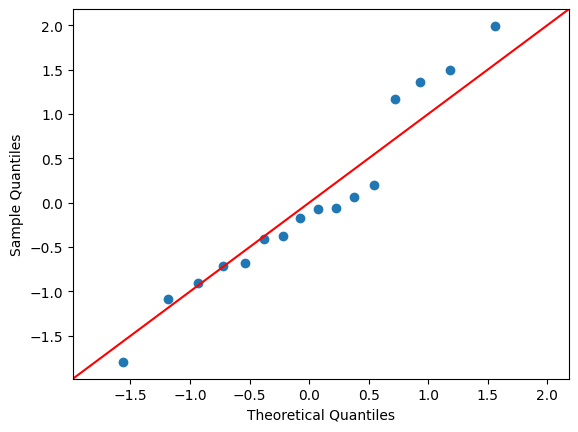

In [44]:
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

In [45]:
data_st.keys()

dict_keys(['data', 'names', 'endog', 'exog', 'endog_name', 'exog_name', 'raw_data'])

In [46]:
data_st['endog'][:5]

0    60323.0
1    61122.0
2    60171.0
3    61187.0
4    63221.0
Name: TOTEMP, dtype: float64

In [47]:
data_st['exog'].head()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [48]:
(317 + 207) - 48

476

In [49]:
T={'фотография', 'математика', 'космос', 'настольные игры', 'рок-музыка'}
N={'настольные игры', 'скейтборд', 'математика', 'космос', 'нумизматика'}
S={'рок-музыка', 'стендап', 'путешествия', 'математика'}

### 2.4 Однофакторный дисперсионный анализ

Однофакторный дисперсионный анализ используется в различных областях науки и практики, включая биологию, медицину, социологию, экономику и т.д.

Однофакторный дисперсионный анализ нужен для следующих целей:
- выявление наличия или отсутствия значимых различий между группами. Также **позволяет определить, какой из факторов оказывает наибольшее влияние на исследуемый признак**;
- оценка степени влияния различных факторов на результат эксперимента.

Заметка автора: возможно **первый пункт** особенно полезен при обучении модели ML.

Построим матрицу 3*3

In [50]:
var = np.array([[3, 1, 2], [5, 3, 4], [7, 6, 5]])
example = pd.DataFrame(var.T, columns = ['M1', 'M2', 'M3'])
example

,M1,M2,M3
0,3,5,7
1,1,3,6
2,2,4,5


Предположим, что

$H_0: M_1 = M_2 = M_3$\
$H_1: M_1 \neq M_2 \neq M_3$

Шаг 1. Найти среднее всех наблюдений
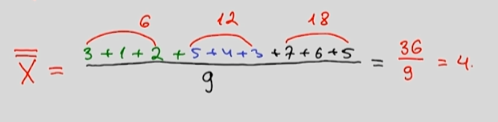

In [51]:
X = example.mean().mean()
X

4.0

#### 2.4.1 SST (Sum of Squares Total)

Что дальше? Переходим к понятию **SST** (sum of squares total) - *сумма квадратов отклонений*
- **SST** характеризует на сколько высока изменчивость данных без учёта разделения их на группы.

Как рассчитывается? Необходимо найти как каждое наблюдение отклоняется от среднего по всем наблюдениям
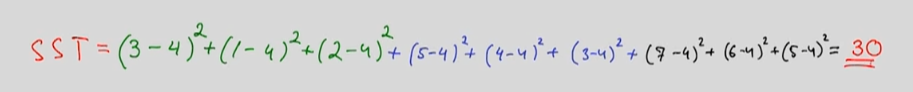

In [52]:
(example - X)**2

,M1,M2,M3
0,1.0,1.0,9.0
1,9.0,1.0,4.0
2,4.0,0.0,1.0


In [53]:
SST = np.sum(np.sum((example - X)**2, axis=0))
SST

30.0

Найдем число степеней свободы\
$df = N - 1$\
Таблица 3*3, т.е. э-ов 9

In [54]:
N = example.shape[0] * example.shape[1]
N

9

In [55]:
df = N - 1
df

8

**SST** проистекает из двух источников **SSB** и **SSW**
||
|:--:|
|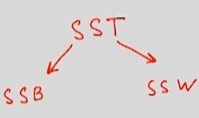|

Что это за показатели?
- **SSB** - характеризуют *изменчивость* значений внутри групп;
- **SSW** - характеризуют *изменчивость* значений между группами.
  
Эта *изменчивоcть* выражается грубо говоря дисперсией.

#### 2.4.2 SSW (Sum of Squares Within Groups) 

Как рассчитываются эти показатели?\
**SSW** (Sum of Squares Within Groups) - сумма квадратов отклонений от среднего для элементов внутри каждой из групп

In [56]:
example

,M1,M2,M3
0,3,5,7
1,1,3,6
2,2,4,5


In [57]:
example.mean()

M1    2.0
M2    4.0
M3    6.0
dtype: float64

In [58]:
SSW = np.sum(np.sum((example - example.mean()) ** 2, axis = 0))
SSW

6.0

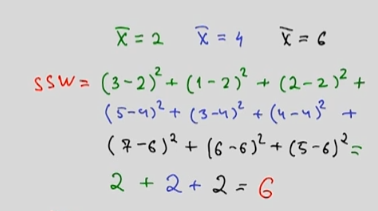


Рассчитаем количество степеней свободы для SSW

$df = N - m$, где

$N$ - количество элементов в наборе данных;\
$m$ - число групп.

In [59]:
m = len(example.columns)

In [60]:
df_SSW = N - m
df_SSW

6

#### 2.4.3 SSB (Sum of Squares Between Groups)

**SSB** (Sum of Squares Between Groups) - сумма квадратов отклонений среднего групп от общего среднего для каждого элемента. Количество э-ов в группе * (Среднее группы - общее среднее) ** 2 => суммировать для всех групп.

In [61]:
example.mean()

M1    2.0
M2    4.0
M3    6.0
dtype: float64

In [62]:
SSB = np.sum(3*(example.mean() - X) ** 2)
SSB

24.0

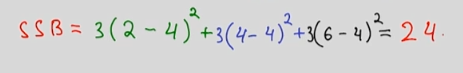

Рассчитаем количество степеней свободы для SSB

$df = m - 1$, где

$m$ - число групп;

In [63]:
m = len(example.columns)
df_SSB = m - 1
df_SSB

2

#### 2.4.4 Что в итоге?

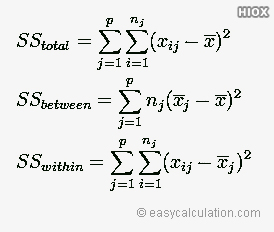

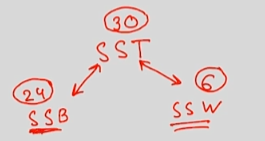

Если большая часть изменчивости, обеспечивается суммой квадратов междугрупповых (типо разные столбы в датафрейме) (SSB > SSW), это значит, что группы значительно различаются между собой.\

Если обратно (SSB < SSW), это говорит о том, что группы не различаются между собой, однако имеется изменчивость внутригрупповая.

#### 2.4.5 Основной статистический показатель дисперсионного анализа

F-критерий(или **критерий Фишера**) в однофакторном дисперсионном анализе измеряет различия между группами, то есть отношение между средними значениями в группах и дисперсией внутри групп.

$F = \Large \frac{\frac{SSB}{m-1}}{\frac{SSW}{N-m}}$

In [64]:
F = (SSB/(m-1))/(SSW/(N-m))
F

12.0

#### 2.4.6 Основная идея статистического вывода

При условии, что верна $H_0$ значение F стремилось бы к минимуму. Так как верх дроби стремился к 0, так как характеризует межгрупповую изменчивость. А внутригрупповая изменчивость(знаменатель) какое-то фиксированное значение(предполагается, что знаменатель больше или равен числителю). 

Теперь при условии, что верна $H_0$, найдем вероятность такого или еще более выраженного различия. 